# Comprehensive Exploratory Data Analysis (EDA) on Diabetes Dataset

### Dataset

[Diabetes 130-US hospitals for years 1999-2008 Data Set](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008)

#### - Objective

Perform a detailed EDA on the Diabetes dataset, emphasizing healthcare-related features. The analysis will cover statistical and probability analysis, correlation analysis, and data visualizations.

#### - Dataset Overview

- Dataset: 101,766 rows, 50 columns
- Data Types: 37 columns - object type, 12 columns - integer type
- Missing Values:
  - 'max_glu_serum': 96,420
  - 'A1Cresult': 84,748
- Dupicated records : No

### Steps 1 : Data Loading

In [1]:
# Import libreries 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

#sys

import warnings
warnings.filterwarnings('ignore')  # to avoud warnings

#import plot 

from plot_functions import plot_column_distributions 

- Download and Load Data


In [2]:
df = pd.read_csv("Dataset/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv")
df_copy = df.copy()

#Load the data into a Pandas DataFrame
df = pd.DataFrame(df)
print(df)

        encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_

In [3]:
# Head 
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


- Initial Exploration



In [5]:
#shape
df.shape

(101766, 50)

In [6]:
#columns and colunms
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
#count data types 

df.dtypes.value_counts()

object    37
int64     13
Name: count, dtype: int64

## 2. Data Cleaning

**Handling Missing Values**

- Identify columns with missing values and choose an imputation or removal strategy.


In [8]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

<Axes: >

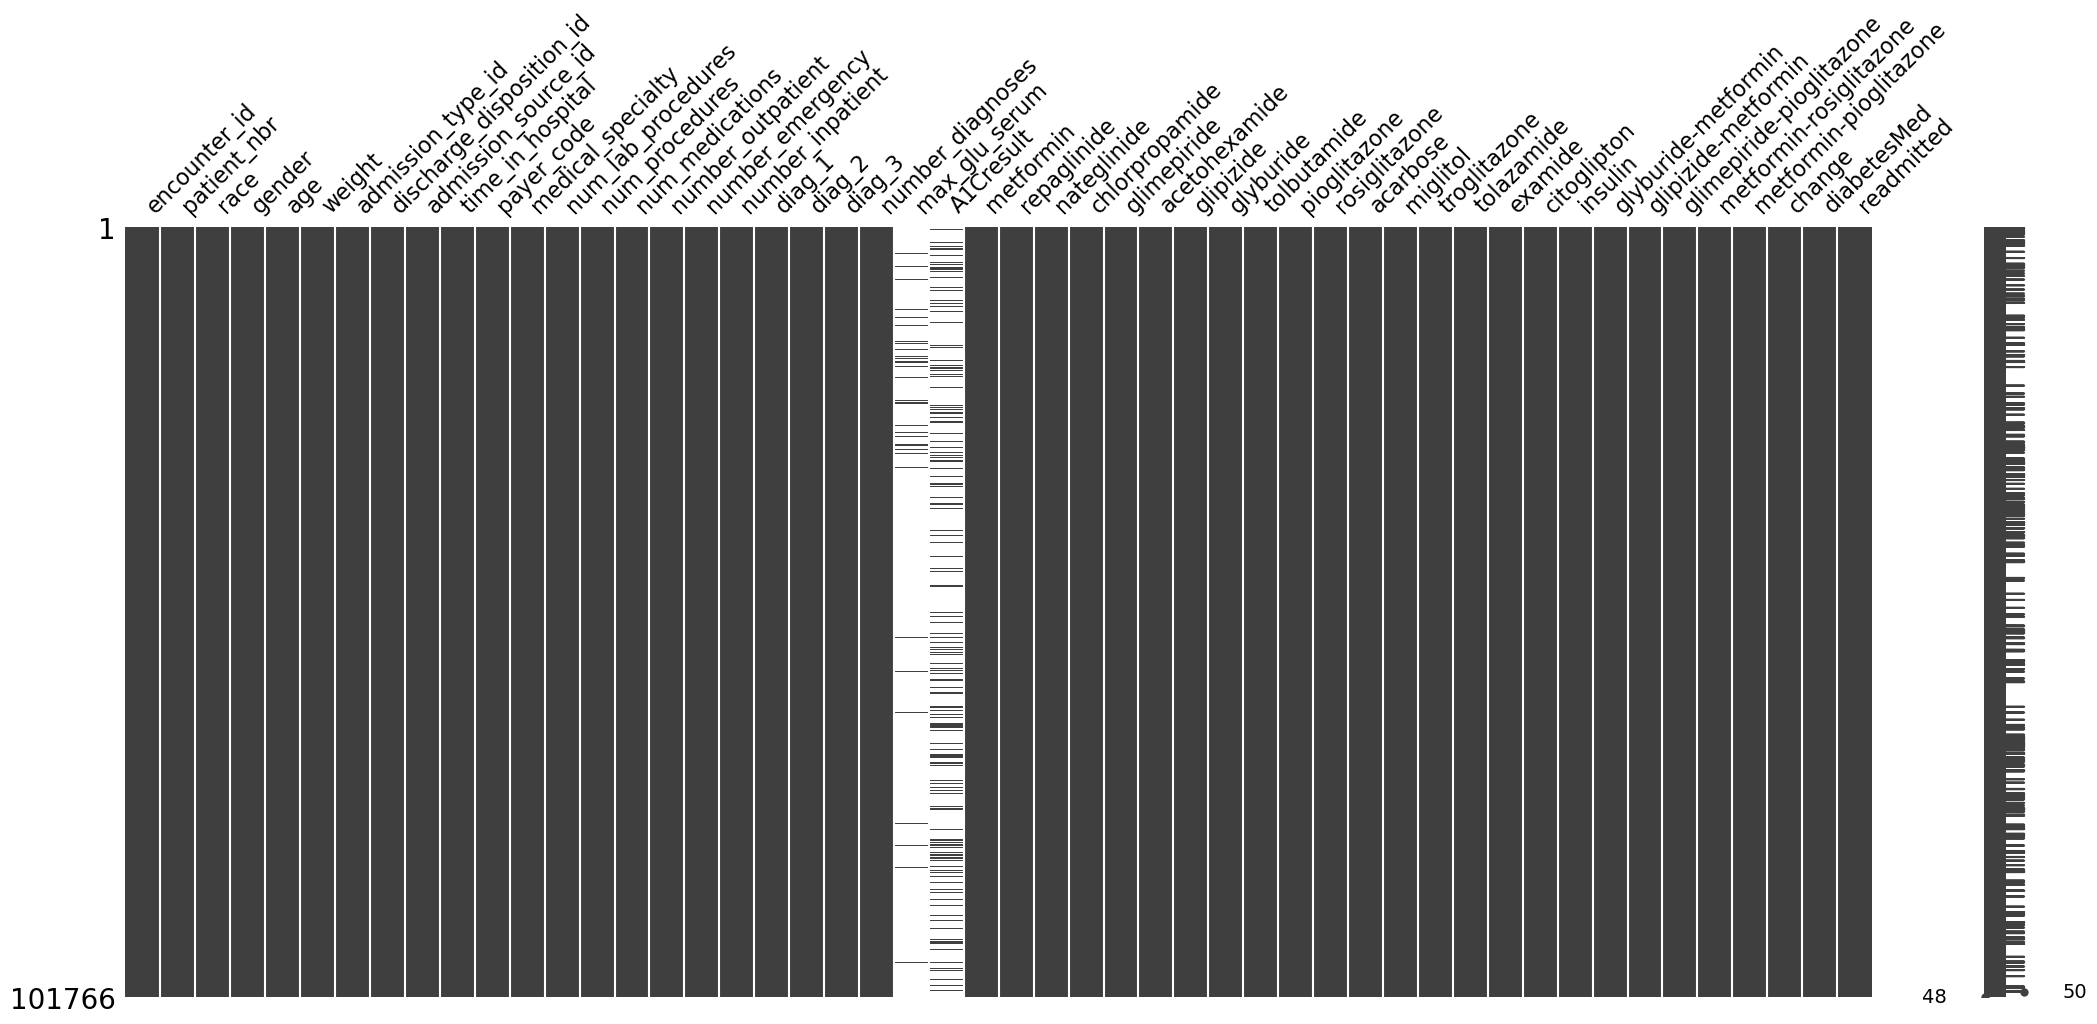

In [9]:
# missinggno is used to visualized missing values

import missingno as msno 

msno.matrix(df)

- Handling missing value

In [10]:
df = df.drop(['A1Cresult','max_glu_serum'], axis=1)

<Axes: >

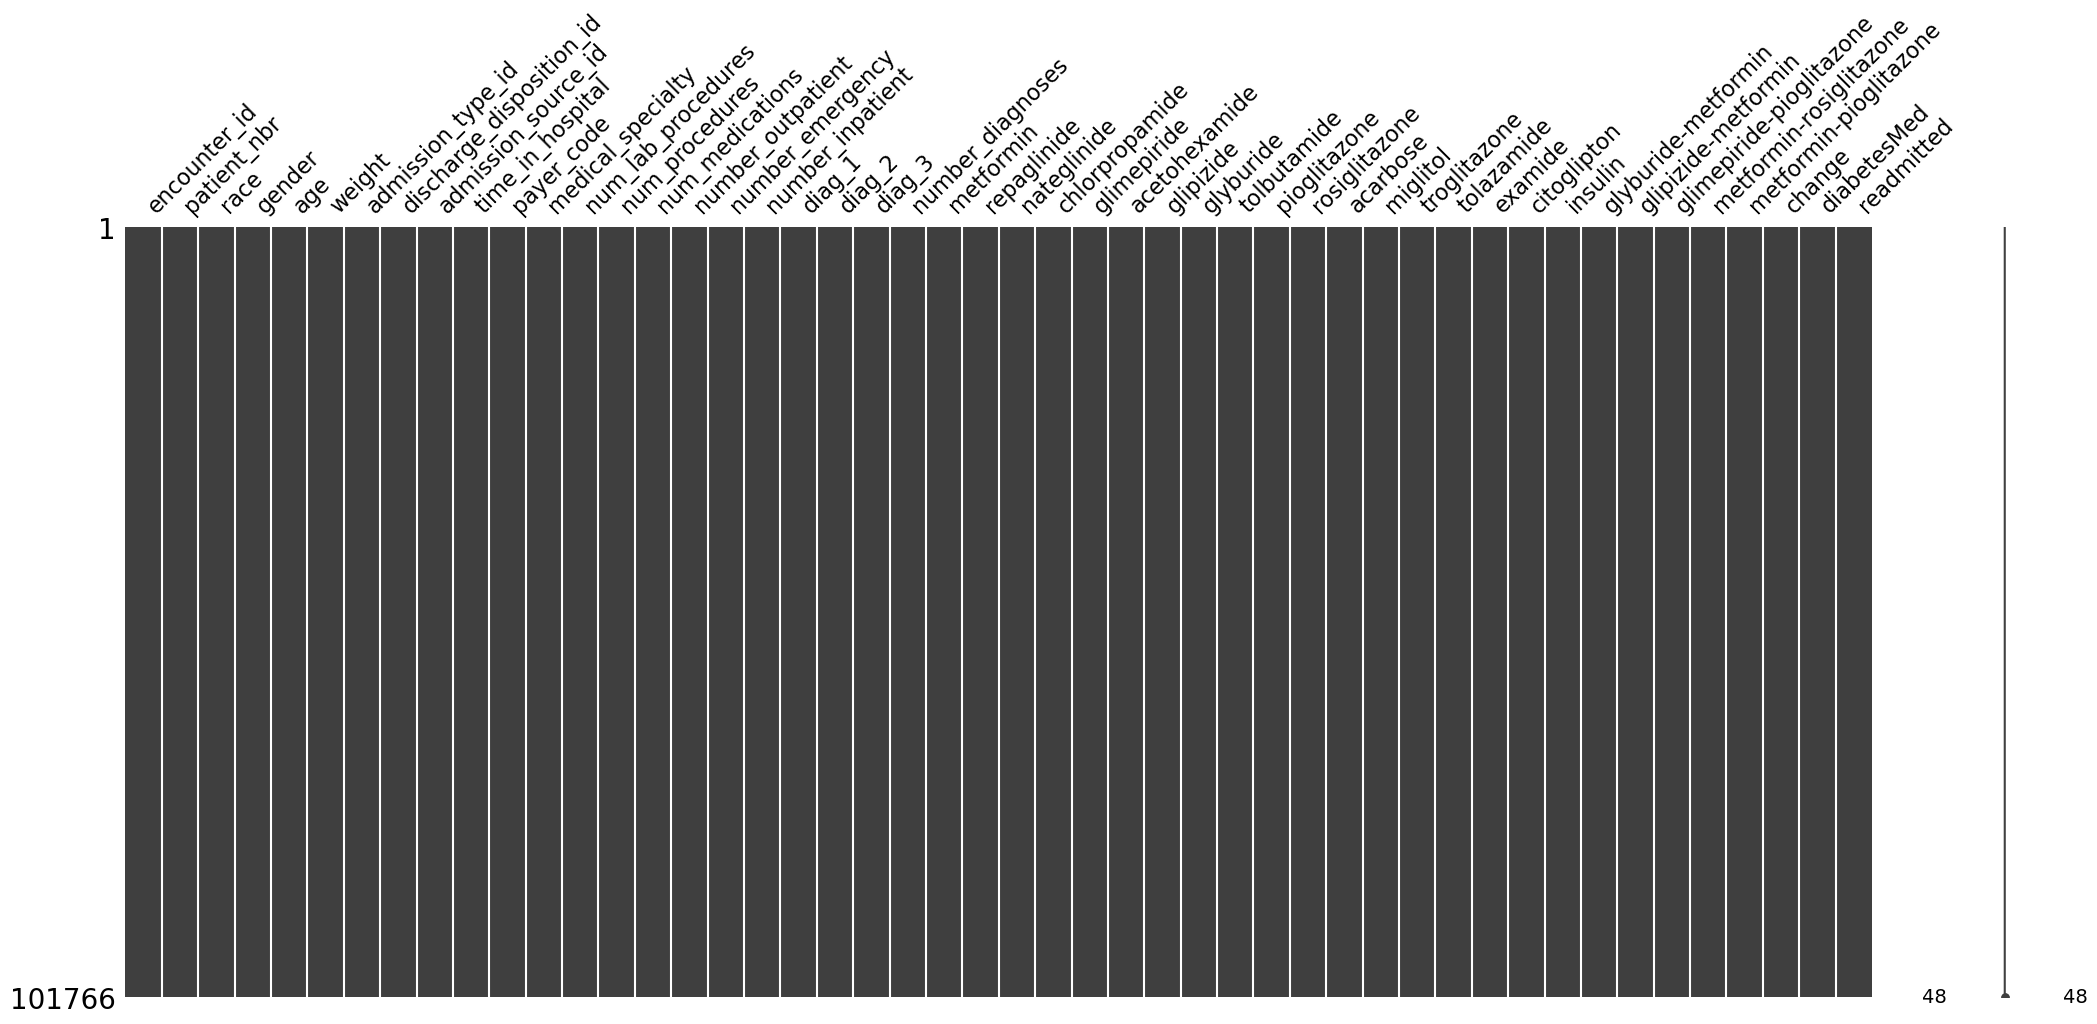

In [11]:
#Plot dataset 
msno.matrix(df)

Rows containing missing values have been eliminated.

- Handling Duplicate Records

In [12]:
print("Count duplicated records:",df.duplicated().value_counts())

Count duplicated records: False    101766
Name: count, dtype: int64


- handling id's 

In [13]:
# Drop 'encounter_id' , 'patient_nbr' , 'admission_type_id','discharge_disposition_id','admission_source_id'  columns

df.drop(['encounter_id', 'patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id'], axis=1, inplace=True)

- Replace Values

Visualize feature distribution plots to assess and identify suitable replacements for values.

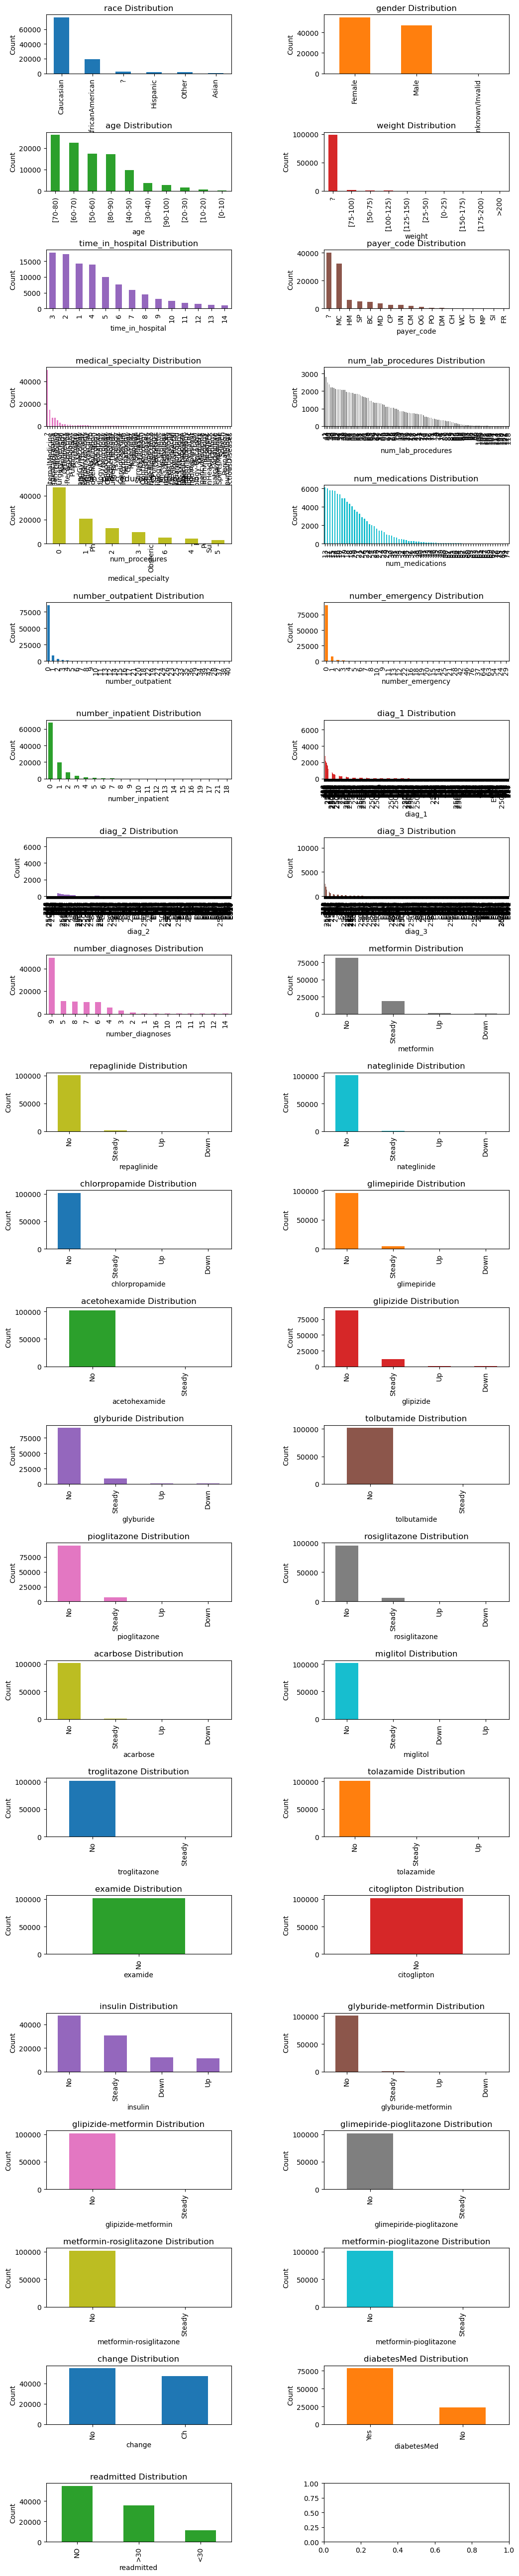

In [14]:
#plot columns distribution

plot_column_distributions(df)

In [15]:
# Replace "Male" with "M" and "Female" with "F" in the 'gender' column
df['gender'].replace({'Male': 'M', 'Female': 'F'}, inplace=True)

#Replace 'weight' containing ? by 0 
df['weight'] = df['weight'].replace('Unknown', 'Unknown')


#Replace 'payer_code' containing ? by 0 
df['payer_code'].replace({'?': 0}, inplace=True)

#Replace 'medical_specialty' containing ? by 0 
df['medical_specialty'].replace({'?': 0}, inplace=True)

#Replace 'citoglipton' containing No by N 
df['citoglipton'].replace({'No': 0}, inplace=True) 

#Replace 'diabetesMed' containing No by N 
df['diabetesMed'].replace({'Yes': 1, 'No': 0}, inplace=True)

#Replace 'race' containing ? by Unknown 
df['race'].replace({'?': 'Unknown'}, inplace=True) 



## 3. Data Preprocessing

- **Distribution of Diabetic Patients**

      - Explore the distribution of diabetic patients across different features.
      - Identify features with significant overrepresentation or underrepresentation.

      

In [16]:
threshold = 0.5

# Remove rows with insignificant values
df = df.dropna(thresh=threshold*len(df.columns))

The code sets a threshold to 0.5 and uses pandas **dropna** to remove rows from a DataFrame where less than 50% of values are non-null. It's a method for filtering out rows with significant missing data.

- Remove inconsistent values

In [17]:
# Drop rows based on conditions
df.drop(df[(df['gender'] == 'Unknown/Invalid') | 
           (df['gender'] == 'Unknown') | 
           (df['race'] == 'Unknown')].index, inplace=True)


Verify filtered values

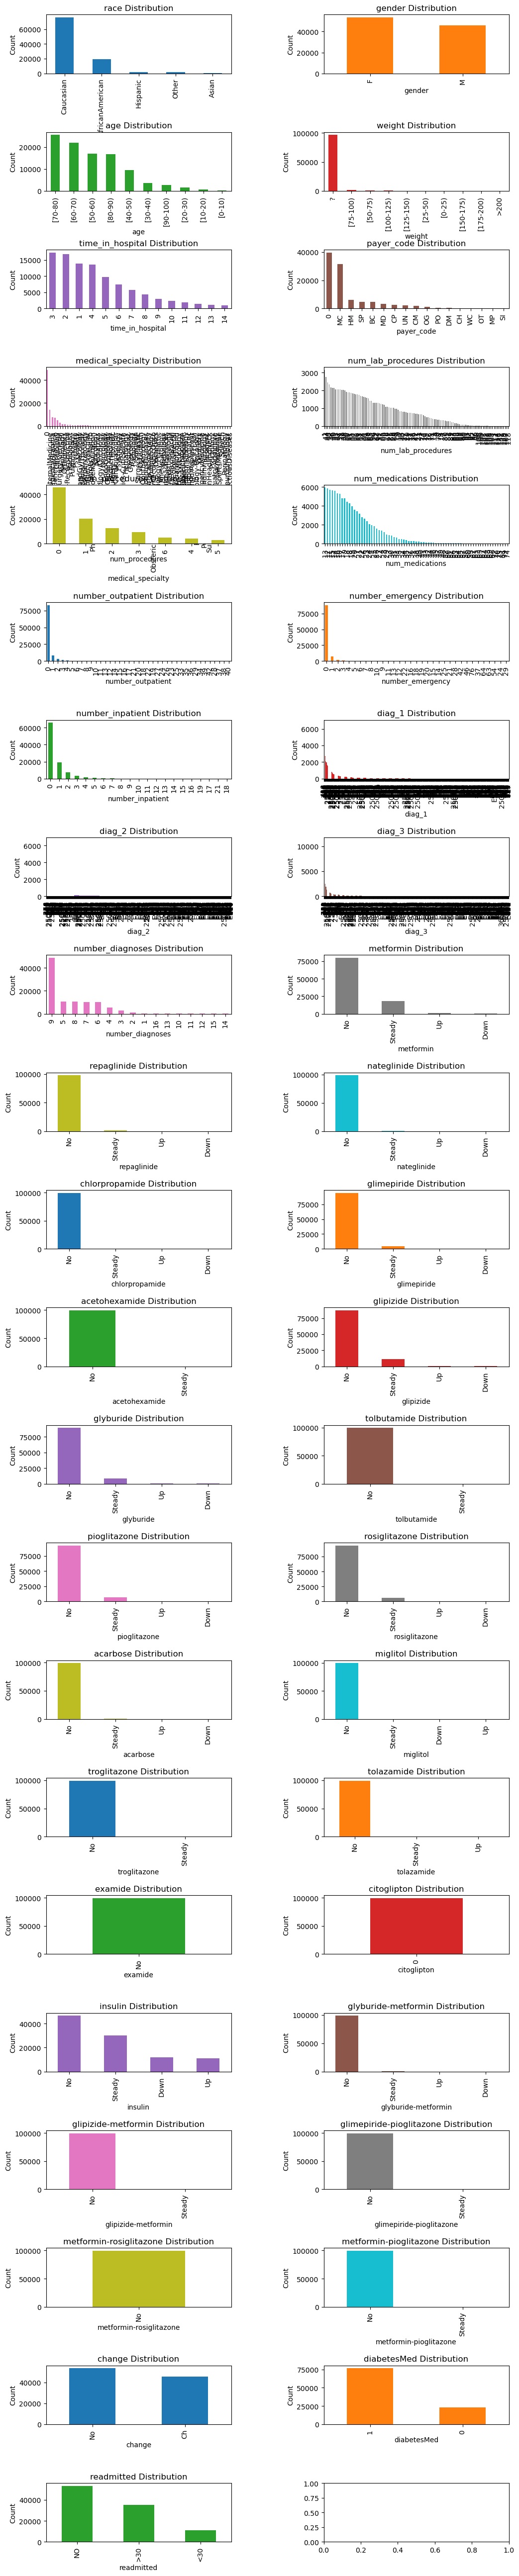

In [18]:
#plot columns distribution to check

plot_column_distributions(df)

- **Handling Categorical Variables**

      - Identify and apply appropriate methods for handling categorical variables (e.g., one-hot encoding).
      - Discuss the impact of your chosen method.
   - **Normalization/Scaling of Numerical Features**

In [19]:
# Extracting categorical and numerical features
numeric_features = df.select_dtypes(include=['int', 'float']).columns
categorical_features = df.select_dtypes(include=['object']).columns


In [20]:
df[numeric_features].head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,citoglipton,diabetesMed
0,1,41,0,1,0,0,0,1,0,0
1,3,59,0,18,0,0,0,9,0,1
2,2,11,5,13,2,0,1,6,0,1
3,2,44,1,16,0,0,0,7,0,1
4,1,51,0,8,0,0,0,5,0,1


In [21]:
df[categorical_features].head()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,metformin,...,tolazamide,examide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted
0,Caucasian,F,[0-10),?,0,Pediatrics-Endocrinology,250.83,?,?,No,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,F,[10-20),?,0,0,276,250.01,255,No,...,No,No,Up,No,No,No,No,No,Ch,>30
2,AfricanAmerican,F,[20-30),?,0,0,648,250,V27,No,...,No,No,No,No,No,No,No,No,No,NO
3,Caucasian,M,[30-40),?,0,0,8,250.43,403,No,...,No,No,Up,No,No,No,No,No,Ch,NO
4,Caucasian,M,[40-50),?,0,0,197,157,250,No,...,No,No,Steady,No,No,No,No,No,Ch,NO


In [22]:
#Columns : categorical_features
categorical_features

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'readmitted'],
      dtype='object')

In [23]:
# Columns numercal columns 
numeric_features

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'citoglipton', 'diabetesMed'],
      dtype='object')

#### Category encoder 

[- Category encoder documentation ](https://contrib.scikit-learn.org/category_encoders/index.html)

category_encoders is a Python library focused on categorical variable encoding for machine learning. It extends the capabilities beyond scikit-learn, providing a diverse set of encoding techniques.

- In summary, the output of the encoding process depends on the specific encoding technique used. It transforms categorical variables into a numerical format that can be used as input for machine learning models. The choice of encoding method depends on the nature of the data and the requirements of the machine learning task.

- The use of 0s and 1s in the encoding of categorical variables aligns with the binary nature of computer representation. This choice facilitates efficient storage, computation, and integration of categorical information into machine learning models, allowing them to handle and learn from categorical data effectively. The specific method (one-hot encoding, binary encoding, etc.) is chosen based on the characteristics of the data and the requirements of the machine learning task at hand.

##### Reasons why `category_encoders` is considered good oe not:

| **Pros**                                       | **Cons**                                          |
|-----------------------------------------------|----------------------------------------------------|
| Diverse Encoding Techniques                   | Complexity                                         |
| High Cardinality Handling                      | Learning Curve                                     |
| Target Encoding                                | Resource Usage                                     |
| Ordinal Encoding with Custom Mappings          | Dependency on Advanced Features                    |
| Consistent API                                 |                                                    |


In [24]:
df[categorical_features].dtypes.value_counts()

object    33
Name: count, dtype: int64

Whe can alos use **OrdinalEncoder** from sklearn 

In [25]:
from sklearn.preprocessing import OrdinalEncoder

# Convert all values in categorical features to strings
df[categorical_features] = df[categorical_features].astype(str)

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the DataFrame
categorical_encoded = encoder.fit_transform(df[categorical_features])

# Convert the result to a DataFrame
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=df[categorical_features].columns)

# Print the resulting DataFrame
print(categorical_encoded_df)


       race  gender  age  weight  payer_code  medical_specialty  diag_1  \
0       2.0     0.0  0.0     1.0         0.0               38.0   124.0   
1       2.0     0.0  1.0     1.0         0.0                0.0   143.0   
2       0.0     0.0  2.0     1.0         0.0                0.0   454.0   
3       2.0     1.0  3.0     1.0         0.0                0.0   553.0   
4       2.0     1.0  4.0     1.0         0.0                0.0    54.0   
...     ...     ...  ...     ...         ...                ...     ...   
99487   0.0     1.0  7.0     1.0         7.0                0.0   102.0   
99488   0.0     0.0  8.0     1.0         7.0                0.0   381.0   
99489   2.0     1.0  7.0     1.0         7.0                0.0   236.0   
99490   2.0     0.0  8.0     1.0         7.0               63.0   691.0   
99491   2.0     1.0  7.0     1.0         0.0                0.0   360.0   

       diag_2  diag_3  metformin  ...  tolazamide  examide  insulin  \
0       648.0   669.0       

## Scaling of Numerical Features

    - Determine if normalization or scaling is necessary for numerical features.
    - Apply the chosen method and explain the rationale.

In this example, StandardScaler is used to standardize the features in the DataFrame df. It subtracts the mean and divides by the standard deviation for each feature, making the features have a mean of 0 and a standard deviation of 1.

In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
numerical_scaled = scaler.fit_transform(df[numeric_features])

# Display the scaled DataFrame
print(numerical_scaled)


[[-1.13776454 -0.10525105 -0.78685084 ... -3.34327157  0.
  -1.82360935]
 [-0.46818685  0.80866387 -0.78685084 ...  0.81034364  0.
   0.54836306]
 [-0.8029757  -1.62844257  2.1479772  ... -0.74726206  0.
   0.54836306]
 ...
 [-1.13776454  0.50402556 -0.78685084 ...  2.88715125  0.
   0.54836306]
 [ 1.87533507  0.09784116  0.38708037 ...  0.81034364  0.
   0.54836306]
 [ 0.53617969 -1.52689647  0.97404598 ...  0.81034364  0.
  -1.82360935]]


In [27]:
# Convert the NumPy arrays to DataFrames
df_numerical_scaled = pd.DataFrame(numerical_scaled, columns=numeric_features)
df_categorical_encoded = pd.DataFrame(categorical_encoded_df, columns=categorical_features)

merged_df = pd.merge(df_numerical_scaled, df_categorical_encoded, left_index=True, right_index=True)

In [28]:
# Display the merged DataFrame
merged_df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,citoglipton,diabetesMed,...,tolazamide,examide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted
0,-1.137765,-0.105251,-0.786851,-1.850613,-0.292416,-0.2142,-0.505840,-3.343272,0.0,-1.823609,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
1,-0.468187,0.808664,-0.786851,0.243043,-0.292416,-0.2142,-0.505840,0.810344,0.0,0.548363,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.802976,-1.628443,2.147977,-0.372738,1.274002,-0.2142,0.280717,-0.747262,0.0,0.548363,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
3,-0.802976,0.047068,-0.199885,-0.003269,-0.292416,-0.2142,-0.505840,-0.228060,0.0,0.548363,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
4,-1.137765,0.402479,-0.786851,-0.988519,-0.292416,-0.2142,-0.505840,-1.266464,0.0,0.548363,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,-0.468187,0.402479,-0.786851,-0.003269,-0.292416,-0.2142,-0.505840,0.810344,0.0,0.548363,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
99488,0.201391,-0.511435,0.974046,0.243043,-0.292416,-0.2142,0.280717,0.810344,0.0,0.548363,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
99489,-1.137765,0.504026,-0.786851,-0.865363,0.490793,-0.2142,-0.505840,2.887151,0.0,0.548363,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
99490,1.875335,0.097841,0.387080,0.612512,-0.292416,-0.2142,0.280717,0.810344,0.0,0.548363,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0


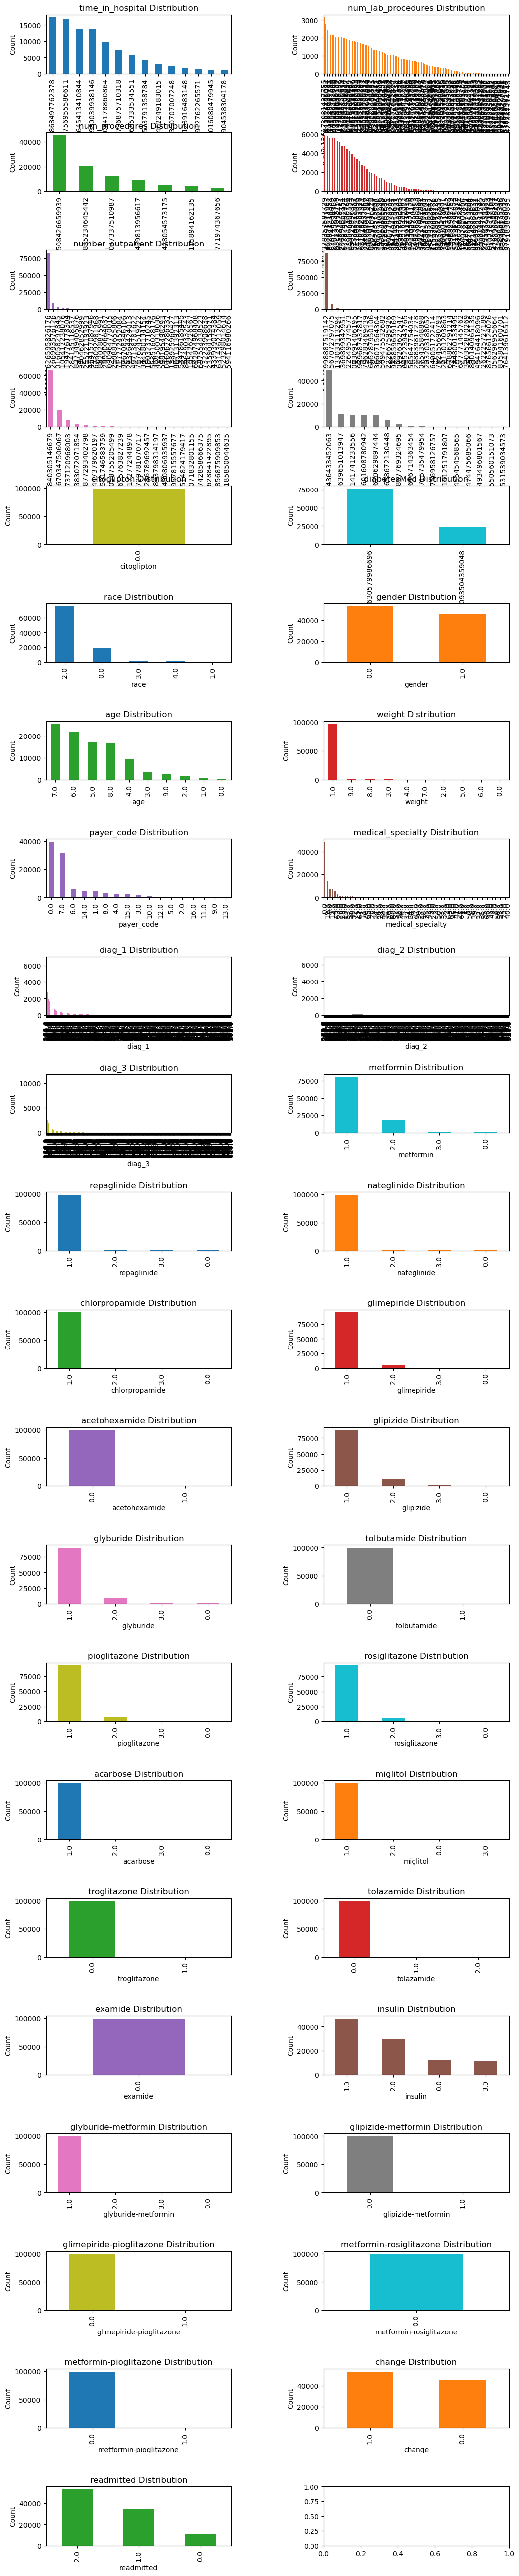

In [29]:
plot_column_distributions(merged_df)

## 4. Descriptive Statistics

   - **Compute Descriptive Statistics**
   
      - Calculate descriptive statistics for key healthcare-related variables.
      - Discuss the central tendency and dispersion of the data.
      
      
   - **Interpretation**
   
      - Based on descriptive statistics, what initial insights can you draw about the healthcare data?


Top 15 Important Columns:
               Feature  Importance
25  num_lab_procedures    0.101052
7               diag_1    0.096194
8               diag_2    0.094478
9               diag_3    0.092062
26     num_medications    0.087279
37    time_in_hospital    0.063223
2                  age    0.051942
19   medical_specialty    0.045728
32          payer_code    0.043561
30    number_inpatient    0.042570
28    number_diagnoses    0.040285
27      num_procedures    0.039355
18             insulin    0.027008
34                race    0.022152
11              gender    0.020700


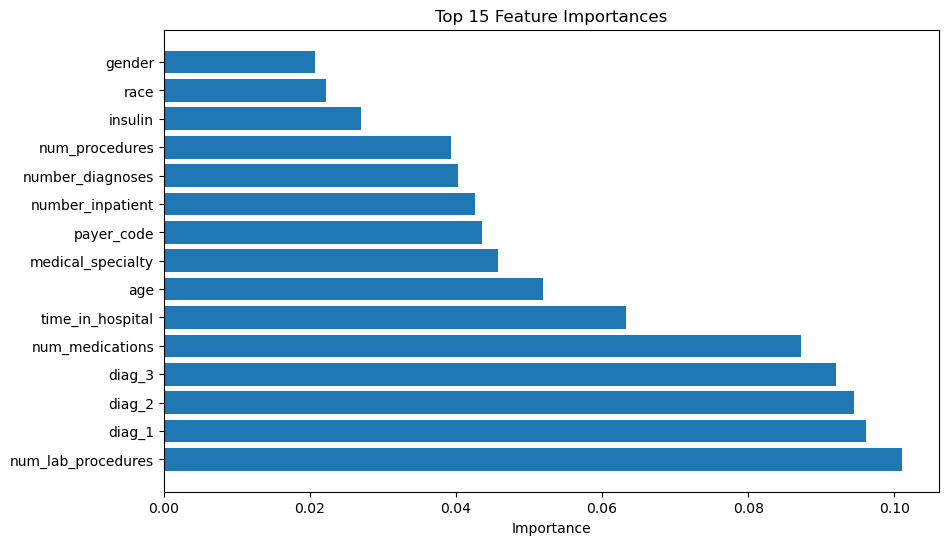

In [30]:
#Feature importance first 

from sklearn.ensemble import RandomForestClassifier

target_variable = 'readmitted'

all_features = merged_df.columns.difference([target_variable])

X = merged_df[all_features]
y = merged_df[target_variable]

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_n = 15  


print(f"Top {top_n} Important Columns:")
print(feature_importance_df.head(top_n))

# Plot the feature importances 
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].head(top_n), feature_importance_df['Importance'].head(top_n))
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances')
plt.show()


* Descriptive statistics ( Relvant Features )

In [31]:
merged_df[feature_importance_df['Feature'].head(15)].describe()

,num_lab_procedures,diag_1,diag_2,diag_3,num_medications,time_in_hospital,age,medical_specialty,payer_code,number_inpatient,number_diagnoses,num_procedures,insulin,race,gender
count,9.949200e+04,99492.000000,99492.000000,99492.000000,9.949200e+04,9.949200e+04,99492.000000,99492.000000,99492.000000,9.949200e+04,9.949200e+04,9.949200e+04,99492.000000,99492.000000,99492.000000
mean,-1.692585e-16,336.720912,276.581313,285.870020,-1.088396e-16,-2.670999e-17,6.095525,11.707384,4.334982,5.463406e-17,-1.005552e-16,-1.314074e-17,1.401791,1.658123,0.461514
std,1.000005e+00,160.185794,153.918355,180.025321,1.000005e+00,1.000005e+00,1.594371,17.512652,4.356566,1.000005e+00,1.000005e+00,1.000005e+00,0.839417,0.861902,0.498519
min,-2.136173e+00,0.000000,0.000000,0.000000,-1.850613e+00,-1.137765e+00,0.000000,0.000000,0.000000,-5.058403e-01,-3.343272e+00,-7.868508e-01,0.000000,0.000000,0.000000
25%,-6.129816e-01,259.000000,141.000000,139.000000,-7.422065e-01,-8.029757e-01,5.000000,0.000000,0.000000,-5.058403e-01,-7.472621e-01,-7.868508e-01,1.000000,2.000000,0.000000
50%,4.706811e-02,298.000000,259.000000,256.000000,-1.264254e-01,-1.333980e-01,6.000000,4.000000,6.000000,-5.058403e-01,2.911417e-01,-1.998852e-01,1.000000,2.000000,0.000000
75%,7.071178e-01,435.000000,375.000000,380.000000,4.893557e-01,5.361797e-01,7.000000,19.000000,7.000000,2.807167e-01,8.103436e-01,3.870804e-01,2.000000,2.000000,1.000000
max,4.515097e+00,714.000000,745.000000,786.000000,8.001885e+00,3.214490e+00,9.000000,72.000000,16.000000,1.601186e+01,4.444757e+00,2.734943e+00,3.000000,4.000000,1.000000


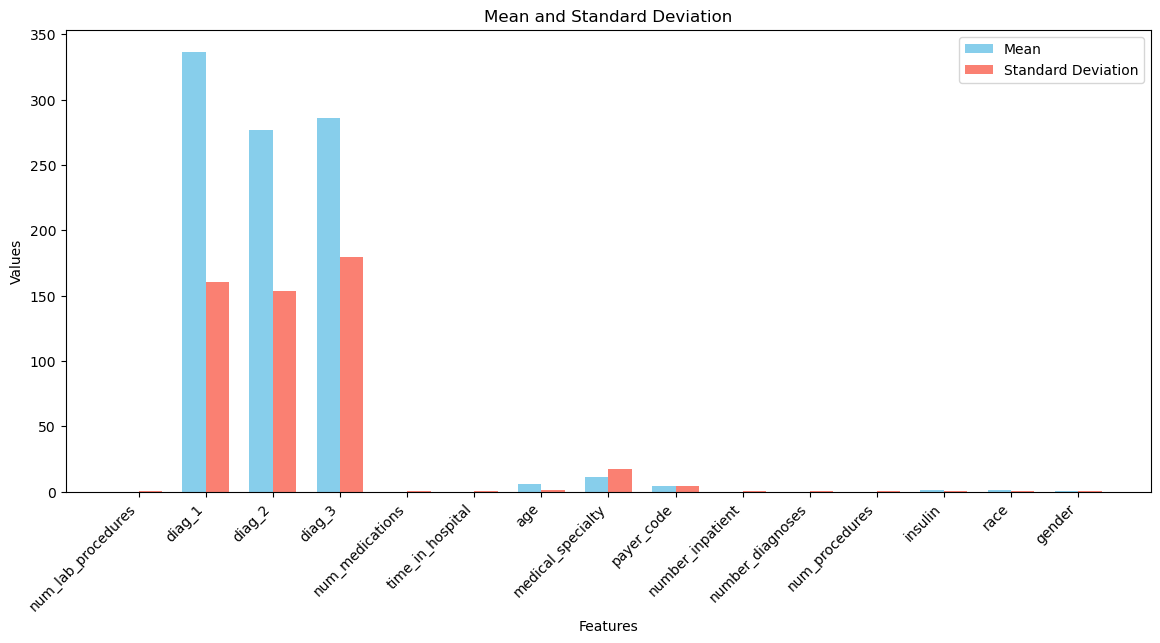

In [32]:
# Assuming merged_df is your DataFrame and feature_importance_df contains 'Feature' column
top_features = feature_importance_df['Feature'].head(15)
selected_df = merged_df[top_features]

# Set up positions for bars
bar_width = 0.35
index = np.arange(len(top_features))

# Plot mean and standard deviation on the same figure
plt.figure(figsize=(14, 6))

# Plot mean
plt.bar(index, selected_df.mean(), bar_width, label='Mean', color='skyblue')

# Plot standard deviation
plt.bar(index + bar_width, selected_df.std(), bar_width, label='Standard Deviation', color='salmon')

# Set x-axis ticks and labels
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Mean and Standard Deviation')
plt.xticks(index + bar_width / 2, top_features, rotation=45, ha='right')
plt.legend()

plt.show()


* Interpretation : 
    
    The relationship between the **mean** and **standard deviation** in a dataset is important in statistics and can provide insights into the distribution of the data. Specifically, **if the mean is greater than the standard deviation**, it indicates that the data **values are generally clustered around the mean** and that there is less variability or dispersion in the dataset.

- Mean > Standart deviantion : **diag_1 , diag_2 , diag_3 , insulin ,and age**
- Mean < Standart deviantion : **Medical_specialty , number_diagnoses, num_lab_procedure **
- Mean = Standart deviantion : **gender , race **

* Hypothetical Interpretation of Diabetes-Related Variables Based on Mean and Standard Deviation

| **Variable Group**                                   | **Interpretation**                                          | **Hypothesis**                                                                                                                                                                     |
|-----------------------------------------------------|--------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Mean > Standard Deviation**                        | Data points concentrated around the mean, less variability.  | These variables (e.g., `diag_1`, `diag_2`, `diag_3`, `insulin`, `age`) may exhibit more predictable patterns in the context of diabetes, such as specific diagnostic codes, insulin usage, race, and age.                                  |
| **Mean < Standard Deviation**                        | Wider spread of data points relative to the mean.           | Variables like `medical_specialty`, `number_diagnoses`, and `num_lab_procedure` may have diverse and varied patterns in the context of diabetes.                                    |
| **Mean = Standard Deviation**                        | Symmetric distribution around the mean.                    | The symmetry in the distribution of `gender` , `race` suggests that, on average, there may be no significant gender-related differences in diabetes characteristics, although individual cases may vary. |

**Note:** These interpretations are speculative, and additional statistical analyses, hypothesis testing, and domain knowledge are needed for robust conclusions.


## 5. Statistical Analysis

   - **Hypothesis Testing**
      - Formulate hypotheses related to healthcare outcomes or features.
      - Conduct hypothesis testing using appropriate statistical tests.
      - Interpret the results and discuss their implications.
   - **Population Inferences**
      - Use statistical tests to make inferences about the broader population based on the sample data.


To test the hypotheses using Python, we can use statistical tests such as **t-tests**, **ANOVA**, or **regression analysis** depending on the nature of your data. Here's an example using t-tests to test the association between two variables. Keep in mind that the choice of statistical test may vary depending on the specific hypothesis and the type of data. Below are examples for Hypothesis 1 and Hypothesis 4 using t-tests:


Based on the provided hypothetical interpretations of diabetes-related variables based on mean and standard deviation, you can formulate and adjust hypotheses for testing using Python. Here are adjusted hypotheses for some of the variables:

In [43]:
from scipy.stats import ttest_ind

# Assuming 'readmitted' is a binary variable (0 or 1)
readmitted_group_1 = merged_df[merged_df['readmitted'] == 1]
readmitted_group_0 = merged_df[merged_df['readmitted'] == 0]

# Assuming feature_importance_df contains a 'Feature' column indicating feature importance
important_features = feature_importance_df['Feature']

for variable in important_features:
    # Perform a t-test comparing the means of the two groups
    t_stat, p_value = ttest_ind(readmitted_group_1[variable], readmitted_group_0[variable], equal_var=False)

    # Print the results
    print(f'{variable}: T-statistic={t_stat}, P-value={p_value}')
    if p_value < 0.05:
        print('Reject the null hypothesis: There is a significant difference in means between readmitted and not readmitted groups.')
    else:
        print('Fail to reject the null hypothesis: There is no significant difference in means between readmitted and not readmitted groups.')
    print('\n')


num_lab_procedures: T-statistic=-1.973903827714017, P-value=0.04840710549258511
Reject the null hypothesis: There is a significant difference in means between readmitted and not readmitted groups.


diag_1: T-statistic=1.5896517098357932, P-value=0.1119307791830932
Fail to reject the null hypothesis: There is no significant difference in means between readmitted and not readmitted groups.


diag_2: T-statistic=-0.1004034758690388, P-value=0.9200251155080317
Fail to reject the null hypothesis: There is no significant difference in means between readmitted and not readmitted groups.


diag_3: T-statistic=-0.7463646300651445, P-value=0.4554565055571822
Fail to reject the null hypothesis: There is no significant difference in means between readmitted and not readmitted groups.


num_medications: T-statistic=-7.530192799692047, P-value=5.307352048538463e-14
Reject the null hypothesis: There is a significant difference in means between readmitted and not readmitted groups.


time_in_hospital

| Variable                  | T-Statistic  | P-Value                 | Interpretation                                               |
|---------------------------|--------------|-------------------------|--------------------------------------------------------------|
| num_lab_procedures        | -1.97        | 0.0484 (Reject)         | Significant difference in means between readmitted and not readmitted groups.                |
| diag_1                    | 1.59         | 0.1119 (Fail to reject) | No significant difference in means between readmitted and not readmitted groups.             |
| diag_2                    | -0.10        | 0.9200 (Fail to reject) | No significant difference in means between readmitted and not readmitted groups.             |
| diag_3                    | -0.75        | 0.4555 (Fail to reject) | No significant difference in means between readmitted and not readmitted groups.             |
| num_medications           | -7.53        | 5.31e-14 (Reject)       | Significant difference in means between readmitted and not readmitted groups.                |
| time_in_hospital          | -8.39        | 5.33e-17 (Reject)       | Significant difference in means between readmitted and not readmitted groups.                |
| age                       | -1.94        | 0.0529 (Fail to reject) | No significant difference in means between readmitted and not readmitted groups.             |
| medical_specialty         | -2.76        | 0.0059 (Reject)         | Significant difference in means between readmitted and not readmitted groups.                |
| payer_code                | 3.35         | 0.00082 (Reject)        | Significant difference in means between readmitted and not readmitted groups.                |
| number_inpatient          | -19.48       | 1.75e-83 (Reject)       | Significant difference in means between readmitted and not readmitted groups.                |
| number_diagnoses          | -2.87        | 0.0041 (Reject)         | Significant difference in means between readmitted and not readmitted groups.                |
| num_procedures            | -1.80        | 0.0720 (Fail to reject) | No significant difference in means between readmitted and not readmitted groups.             |
| insulin                   | -0.46        | 0.6427 (Fail to reject) | No significant difference in means between readmitted and not readmitted groups.             |
| race                      | 0.75         | 0.4512 (Fail to reject) | No significant difference in means between readmitted and not readmitted groups.             |
| gender                    | -1.37        | 0.1700 (Fail to reject) | No significant difference in means between readmitted and not readmitted groups.             |
| ... (omitted for brevity) |
| acarbose                  | 3.01         | 0.0026 (Reject)         | Significant difference in means between readmitted and not readmitted groups.                |
| chlorpropamide            | 2.27         | 0.0234 (Reject)         | Significant difference in means between readmitted and not readmitted groups.                |
| tolazamide                | 0.25         | 0.8064 (Fail to reject) | No significant difference in means between readmitted and not readmitted groups.             |
| miglitol                  | 1.90         | 0.0574 (Fail to reject) | No significant difference in means between readmitted and not readmitted groups.             |
| tolbutamide               | 0.72         | 0.4713 (Fail to reject) | No significant difference in means between readmitted and not readmitted groups.             |
| glipizide-metformin       | 0.94         | 0.3460 (Fail to reject) | No significant difference in means between readmitted and not readmitted groups.             |

**Interpretation Summary:**
- Features with a significant difference in means (where we reject the null hypothesis) might indicate patterns related to diabetes management and hospital readmission.
- Features with no significant difference in means may not contribute significantly to differences between readmitted and not readmitted groups in the context of diabetes.

